# Final Project : Diagnosing Heart Disease


In [1]:
# Intro : 
# Step 0 : Data acquisition
# Step 1 : Data wrangling
    ## 1A : Understand Info contained in Data & Examinine Data for Potential Issues
    ## 1B: Cleaning Data
    ## 1C : Manipulating Data
# Step 2: Data storage
# Step 3: Data exploration and analysis
# Step 4: Feature selection
# Step 5: Machine learning model training
# Step 6: Model evaluation (Supervised Learning Algorithms)
# Step 7: Reporting and presentation of insights
# Step 8: Metrics 
# Step 9: Real-World Application

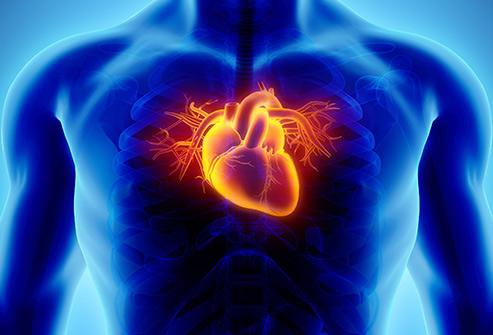

# Intro : 

**Overview:** Diagnosis of cardiovascular disease using various medical tests is a complicated task which should be performed accurately. Hence a powerful tool in the prediction of heart disease with lower cost has become the need of time. 


**Rationale:** Machine Learning can be useful in characterising cardiovascular risk, predict outcomes and identify biomarkers in population studies.

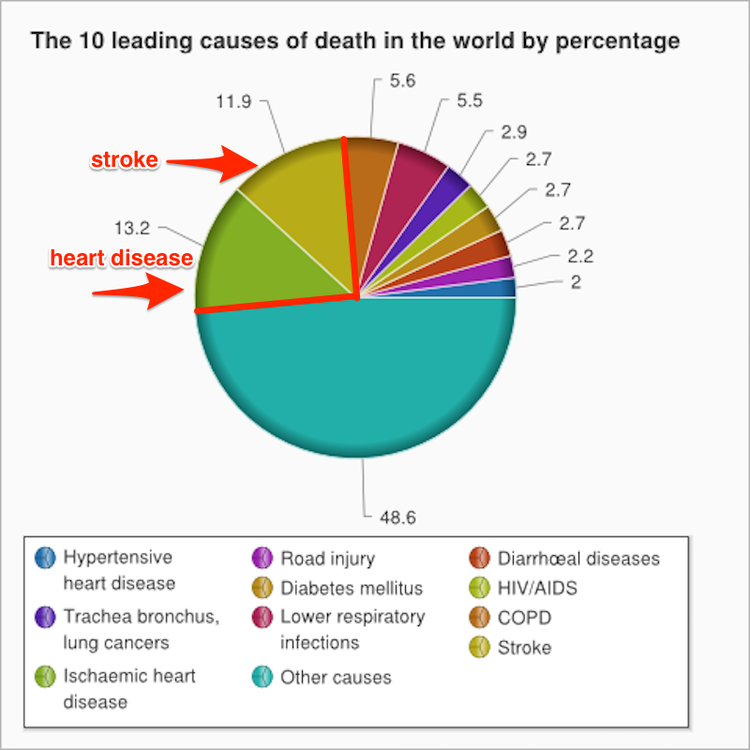

# Step 0 : Data acquisition


In [2]:
# Importing our libraries

# Pandas -> data manipulation
import pandas as pd 
pd.options.mode.chained_assignment = None  #hide any pandas warnings

# Numpy
import numpy as np

# Stats
import scipy.stats as stats

# Matplotlib
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
%matplotlib inline

# Plotly
import plotly
import plotly.graph_objs as go
import plotly.figure_factory as ff

# Seaborn
import seaborn as sns

# Wordcloud
from wordcloud import WordCloud 

## Sci-kit learn
# Train & testing
from sklearn.model_selection import train_test_split

# Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Metrics
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

## Models
# Supervised Learning/Non-deep Algorithms
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Supervised Learning/Deep Algorithms
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Unsupervised Learning Algorithms
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

## Extras
# Plotting 3D Models
from mpl_toolkits.mplot3d import Axes3D

# Random
import random

# Asci Letters
from string import ascii_letters


Using TensorFlow backend.


In [3]:
# Importing our dataset
data = pd.read_csv('./heart.csv')


Data contains;

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital)
5. chol - serum cholestoral in mg/dl
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg - resting electrocardiographic results
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest
11. slope - the slope of the peak exercise ST segment
12. ca - number of major vessels (0-3) colored by flourosopy
13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target - have heart disease or not (1=yes, 0=no)

In [4]:
data.columns
ls_columns= ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

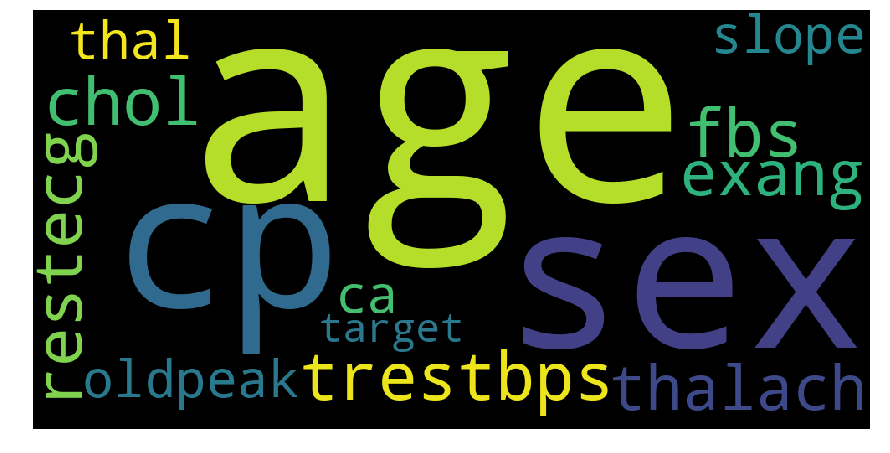

In [5]:
# Wordcloud of names of our columns
unique_string=(" ").join(ls_columns)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("columns_wordcloud"+".png", bbox_inches='tight')
plt.show()
plt.close()


# Step 1 : Data wrangling

## 1A : Understand Info contained in Data & Examinine Data for Potential Issues

In [6]:
display(data.head())


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
data.shape

(303, 14)

In [8]:
# Get main statistics for numerical columns in the data
data.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Text xticklabel objects>)

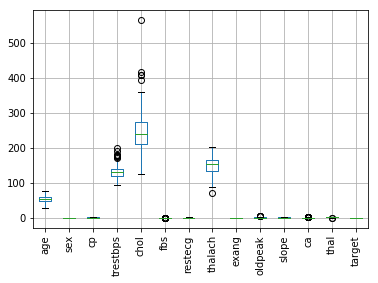

In [9]:
# Minimum value, maximum value, IQR, Q3, Q1, Median and Outliers for each column
data.boxplot()
plt.xticks(rotation = 90)


In [10]:
# Number of rows, number of columns
data.shape


(303, 14)

In [11]:
# Data types
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

## 1B: Cleaning Data

### Missing Values

In [12]:
# Find how prevalent missing values are in our data 
null_cols = data.isnull().sum()
null_cols[null_cols > 0]
null_cols

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Incorrect Values 

In [13]:
# Find any incorrect data-type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [14]:
# All values seem correct
# Investigate why oldpeak is float64
print(data["oldpeak"].head())

0    2.3
1    3.5
2    1.4
3    0.8
4    0.6
Name: oldpeak, dtype: float64


In [15]:
# Makes sense after seing printed output since heart rate is very sensitive and even decimal places matters. This ST depression induced by exercise relative to rest.

### Low Variance Columns


In [16]:
# Find columns with low variance

low_variance = []

for col in data._get_numeric_data():
    minimum = min(data[col])
    ninety_perc = np.percentile(data[col], 90)
    if ninety_perc == minimum:
        low_variance.append(col)

print(low_variance)


[]


### Outliers -> Percentiles


In [17]:
#Find what cols still have low variance (though not as low as before)

low_variance2 = []

for col in data._get_numeric_data():
    minimum = min(data[col])
    ninety_perc = np.percentile(data[col], 85)
    if ninety_perc == minimum:
        low_variance2.append(col)

print(low_variance2)


['fbs']


In [18]:
# Do research understand if "fbs" is outlier or not
# 1) What is Fbs?  A test to determine how much glucose (sugar) is in a blood sample after an overnight fast. The fasting blood glucose test is commonly used to detect diabetes mellitus. A blood sample is taken in a lab, physician's office, or hospital. The test is done in the morning, before the person has eaten. 
# 2) What is a normal Fbs? The US Federal Drug Administration allows home glucose monitors to have a variance of 15% in results. That means a reading of 100 mg/dl might actually be as low as 85 mg/dl or as high as 115, a huge variation
# Conc) Maintain column since variance is accepted in general health guidelines.

### Extreme Values -> IQR


In [19]:
# Find outliers by first creating new column with inter-quartile range 

stats = data.describe().transpose()
stats['IQR'] = stats['75%'] - stats['25%']
stats


,count,mean,std,min,25%,50%,75%,max,IQR
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0,13.5
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0,2.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0,20.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0,63.5
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0,0.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0,1.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0,32.5
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2,1.6


In [20]:
# Find outliers by assing or subtracting 3(iqr) to the lower and upper quartile
outliers = pd.DataFrame(columns=data.columns)

for col in stats.index:
    iqr = stats.at[col,'IQR']
    cutoff = iqr * 3
    lower = stats.at[col,'25%'] - cutoff
    upper = stats.at[col,'75%'] + cutoff
    results = data[(data[col] < lower) | 
                   (data[col] > upper)].copy()
    results['Outlier'] = col
    outliers = outliers.append(results)
    
outliers.head()

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




,Outlier,age,ca,chol,cp,exang,fbs,oldpeak,restecg,sex,slope,target,thal,thalach,trestbps
85,chol,67,0,564,2,0,0,1.6,0,0,1,1,3,160,115
0,fbs,63,0,233,3,0,1,2.3,0,1,0,1,1,150,145
8,fbs,52,0,199,2,0,1,0.5,1,1,2,1,3,162,172
14,fbs,58,0,283,3,0,1,1.0,0,0,2,1,2,162,150
23,fbs,61,0,243,2,1,1,1.0,1,1,1,1,2,137,150


In [21]:
#all but one value in outliers is fbs. Fbs stands for fasting blood sugar and data being very dispersed is normal, so we will only focus on understanding the other outlier.

In [22]:
#outlier with value col has maximum level of serum cholestoral in mg/dl in the whole dataset. It exceeds the mean (246) and distorts the data.

In [23]:
data = data.drop(index = 85)
#data.head()

### Finding and Removing Duplicates


In [24]:
# Remove duplicate entries

before = len(data)
data = data.drop_duplicates()
after = len(data)
print('Number of duplicate records dropped: ', str(before - after))


Number of duplicate records dropped:  1


## 1C : Manipulating Data

### Understanding what columns mean


Necessary before data was manipulated:

- 'age in years'
- 'sex (1 = male; 0 = female)'
- 'chest pain type (4 values)'
- 'resting blood pressure '
- 'chol'
- 'fasting blood sugar'
- 'restecg'
- 'maximum heart rate achieved'
- 'exercise induced angina'
- 'oldpeak'
- 'slope of the peak'
- 'number of major vessels'
- 'thal'
- 'target'



# Step 2: Data storage

In [25]:
# Store the clean csv file in a separate file in our same directory 
data.to_csv('./heartClean.csv', index=False)


# Step 3: Data exploration and analysis

### Target


In [26]:
# Find what values and how many of them our contained in the "target" column
data.target.value_counts()


1    163
0    138
Name: target, dtype: int64

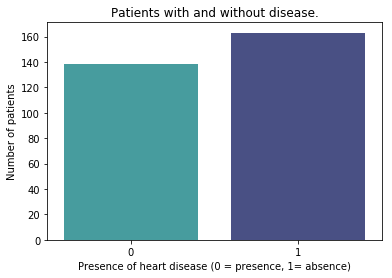

In [27]:
# show the distribution of values in the "target" column -> 
# shows the distribution of patients with and without disease 

sns.countplot(x="target", data=data, palette="mako_r")
plt.xlabel("Presence of heart disease (0 = presence, 1= absence)")
plt.ylabel("Number of patients")
plt.title("Patients with and without disease.")
plt.show()


In [28]:
# Display the percentage of patients with and without disease 

countNoDisease = len(data[data.target == 0])
countHaveDisease = len(data[data.target == 1])
print("Percentage of Patients Haven't got Heart Disease: {:.2f}%".format((countNoDisease / (len(data.target))*100)))
print("Percentage of Patients Have got Heart Disease: {:.2f}%".format((countHaveDisease / (len(data.target))*100)))


Percentage of Patients Haven't got Heart Disease: 45.85%
Percentage of Patients Have got Heart Disease: 54.15%


### Age

In [29]:
# Median of ages of all of our patients
print("Median age of all patients:")
data.loc[:,"age"].median()

Median age of all patients:


55.0

In [30]:
# Standard deviation of ages of all of our patients 
print("Standard deviation of ages of all patients:")
data.loc[:,"age"].std()

Standard deviation of ages of all patients:


9.033792839530506

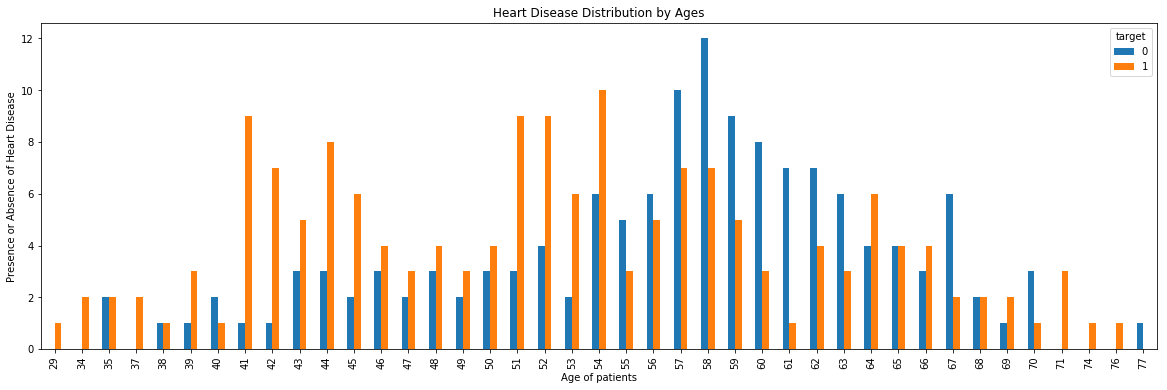

In [31]:
# Show how the presence of heart disease varies according to age 

pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Distribution by Ages')
plt.xlabel('Age of patients')
plt.ylabel('Presence or Absence of Heart Disease')
plt.show()


Parece distribucción bimodal de los datos:

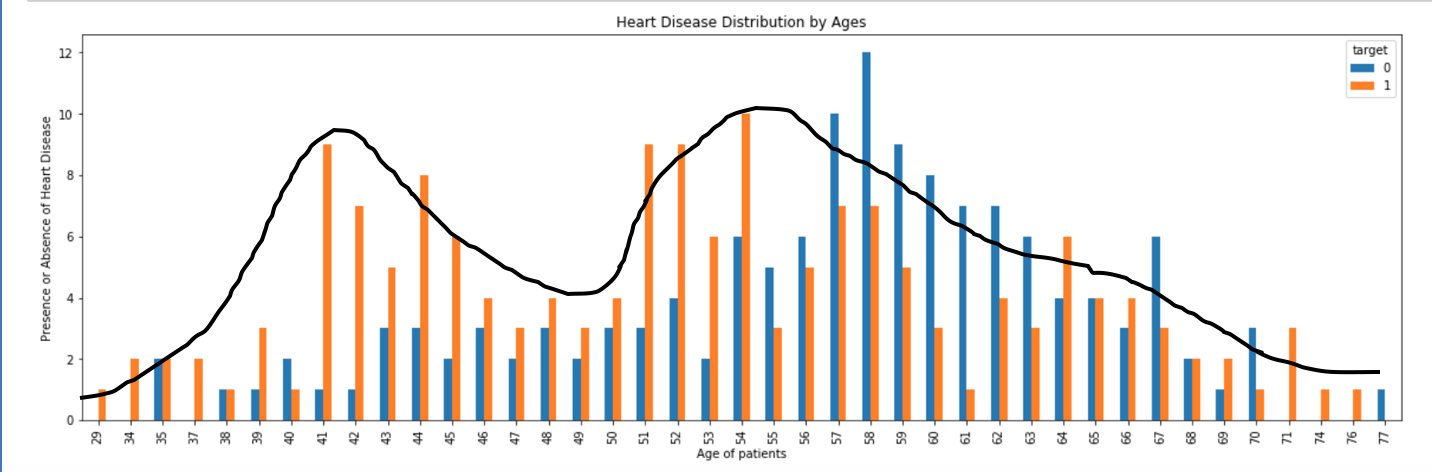

In [32]:
#### Median Age per decade

thirties = []
fourties = []
fifties = []
sixties = []
seventies = []

for i in data['age']:
    if data.loc[i,"age"] < 40:
        thirties.append(data.loc[i,"age"])
    elif data.loc[i,"age"] < 50:
        fourties.append(data.loc[i,"age"])
    elif data.loc[i,"age"] < 60:
        fifties.append(data.loc[i,"age"])
    elif data.loc[i,"age"] < 70:
        sixties.append(data.loc[i,"age"])
    elif data.loc[i,"age"] < 80:
        seventies.append(data.loc[i,"age"])
        
import statistics
print('Median of ages of our patients grouped by decades')
print("Ages 30 to 40: " + str(statistics.median(thirties)))
print("Ages 40 to 50: " + str(statistics.median(fourties)))
print("Ages 50 to 60: " + str(statistics.median(fifties)))
print("Ages 60 to 70: " + str(statistics.median(sixties)))
print("Ages 70 to 80: " + str(statistics.median(seventies)))


Median of ages of our patients grouped by decades
Ages 30 to 40: 34.5
Ages 40 to 50: 45.0
Ages 50 to 60: 53.0
Ages 60 to 70: 63.0
Ages 70 to 80: 71


In [33]:
#### Categorise for decades

data.reset_index(drop=True, inplace=True)

data_decade = []

for i in range(len(data)):
    if data.loc[i,"age"] < 40:
        data_decade.append(1)
    elif data.loc[i,"age"] < 50:
        data_decade.append(2)
    elif data.loc[i,"age"] < 60:
        data_decade.append(3)
    elif data.loc[i,"age"] < 70:
        data_decade.append(4)    
    elif data.loc[i,"age"] < 80:
        data_decade.append(5)   
        
data['decade']= data_decade
data.drop(['age'], axis=1)

data.decade.head()

0    4
1    1
2    2
3    3
4    3
Name: decade, dtype: int64

### Gender

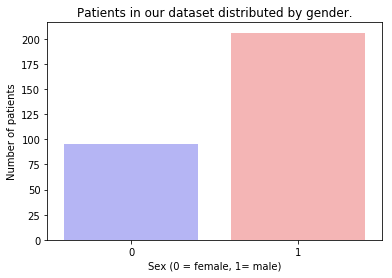

In [34]:
# Show the distribution of values in the "sex" column

sns.countplot(x='sex', data=data, palette="bwr")
plt.xlabel("Sex (0 = female, 1= male)")
plt.ylabel("Number of patients")
plt.title("Patients in our dataset distributed by gender.")
plt.show()

In [35]:
# Display the percentage of patients female and male

countFemale = len(data[data.sex == 0])
countMale = len(data[data.sex == 1])
print("Percentage of Female Patients in our Dataset: {:.2f}%".format((countFemale / (len(data.sex))*100)))
print("Percentage of Male Patients in our Dataset: {:.2f}%".format((countMale / (len(data.sex))*100)))


Percentage of Female Patients in our Dataset: 31.56%
Percentage of Male Patients in our Dataset: 68.44%


In [36]:
# Contingency table female/male by disease
target_sex = pd.crosstab(index=data["sex"],columns=data["target"])
target_sex.index= ["female","male"]
target_sex.columns= ["Disease","No disease"]
target_sex


,Disease,No disease
female,24,71
male,114,92


** Why pvalue?** A small p-value (typically ≤ 0.05) indicates strong evidence against the null hypothesis, so you reject the null hypothesis.

In [37]:
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact(target_sex)

print("\npvalue : " + str(pvalue))
print("rounded pvalue : " + str(round(pvalue, 6)))


pvalue : 1.0095331215163644e-06
rounded pvalue : 1e-06


** What is chi2?** The chi-squared test is used to determine whether there is a significant difference between the expected frequencies and the observed frequencies in one or more categories.

** Why chi2?** To compare whether gender is a significant indicator/predictor heart disease.


In [38]:
stats.chi2_contingency(target_sex)

(22.493215667140493,
 2.1088709838803105e-06,
 1,
 array([[ 43.55481728,  51.44518272],
        [ 94.44518272, 111.55481728]]))

In [39]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# contingency table
table = [[ 43.55481728,  51.44518272],
        [ 94.44518272, 111.55481728]]
#print(table)
stat, p, dof, expected = chi2_contingency(table)
#print('dof=%d' % dof)
#print(expected)

# interpret test-statistic
print("\n")
print("The critical value is calculated and interpreted, finding that the variables are : ")
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('dependent (reject H0)')
else:
    print('independent (fail to reject H0)')
print('given that : probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

print("\n")

# interpret p-value
print("The interpretation of the p-value finds that the variables are : ")
alpha = 1.0 - prob
if p <= alpha:
    print('dependent (reject H0)')
else:
    print('independent (fail to reject H0)')
print('given that : significance=%.3f, p=%.3f' % (alpha, p))




The critical value is calculated and interpreted, finding that the variables are : 
independent (fail to reject H0)
given that : probability=0.950, critical=3.841, stat=0.015


The interpretation of the p-value finds that the variables are : 
independent (fail to reject H0)
given that : significance=0.050, p=0.901


In [40]:
# The critical value is calculated and interpreted, 
# finding that indeed the variables are independent (fail to reject H0). 
# The interpretation of the p-value makes the same finding.


### Fasting Blood Sugar


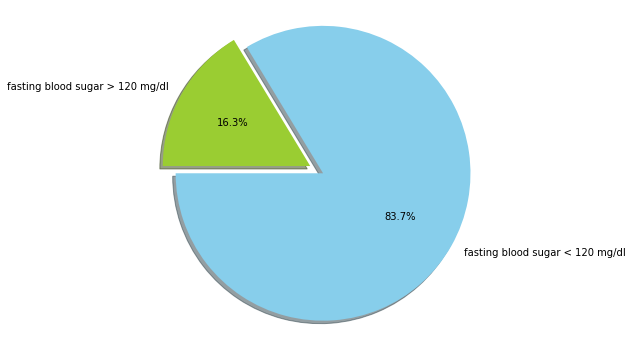

In [41]:
# Show the different fasting blood sugars the patients in our dataset have

plt.figure(figsize=(8,6))

# Data to plot
labels = 'fasting blood sugar < 120 mg/dl','fasting blood sugar > 120 mg/dl'
sizes = [len(data[data['fbs'] == 0]),len(data[data['cp'] == 1])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

In [42]:
# Contingency table >120mg fbs or not by disease
target_fbs = pd.crosstab(index=data["fbs"],columns=data["target"])
target_fbs.index= ["fasting blood sugar < 120 mg/dl","fasting blood sugar > 120 mg/dl"]
target_fbs.columns= ["Disease","No disease"]
target_fbs


,Disease,No disease
fasting blood sugar < 120 mg/dl,116,140
fasting blood sugar > 120 mg/dl,22,23


In [43]:
oddsratio, pvalue = stats.fisher_exact(target_fbs)

print("\npvalue : " + str(pvalue))
print("rounded pvalue : " + str(round(pvalue, 6)))


pvalue : 0.74606873410869
rounded pvalue : 0.746069


In [44]:
stats.chi2_contingency(target_fbs)

(0.07943112472739672,
 0.7780698179305865,
 1,
 array([[117.36877076, 138.63122924],
        [ 20.63122924,  24.36877076]]))

In [45]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# contingency table
table = [[117.36877076, 138.63122924],
        [ 20.63122924,  24.36877076]]

#print(table)
stat, p, dof, expected = chi2_contingency(table)
#print('dof=%d' % dof)
#print(expected)

# interpret test-statistic
print("\n")
print("The critical value is calculated and interpreted, finding that the variables are : ")
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('dependent (reject H0)')
else:
    print('independent (fail to reject H0)')
print('given that : probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

print("\n")

# interpret p-value
print("The interpretation of the p-value finds that the variables are : ")
alpha = 1.0 - prob
if p <= alpha:
    print('dependent (reject H0)')
else:
    print('independent (fail to reject H0)')
print('given that : significance=%.3f, p=%.3f' % (alpha, p))




The critical value is calculated and interpreted, finding that the variables are : 
independent (fail to reject H0)
given that : probability=0.950, critical=3.841, stat=0.026


The interpretation of the p-value finds that the variables are : 
independent (fail to reject H0)
given that : significance=0.050, p=0.871


### Exercise Induced Angina

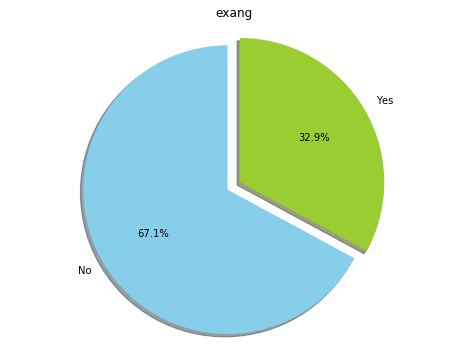

In [46]:
# Show the different exangs the patients in our dataset have

plt.figure(figsize=(8,6))

# Data to plot
labels = 'No','Yes'
sizes = [len(data[data['exang'] == 0]),len(data[data['exang'] == 1])]
colors = ['skyblue', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=90)
 
plt.title('exang')
plt.axis('equal')
plt.show()

In [47]:
# Contingency table presence/absence of exercise induced angina by disease
target_exang = pd.crosstab(index=data["exang"],columns=data["target"])
target_sex.index= ["Absence of angina","Presence of angina"]
target_exang.columns= ["Disease","No disease"]
target_exang


,Disease,No disease
exang,,
0,62,140
1,76,23


In [48]:
oddsratio, pvalue = stats.fisher_exact(target_exang)

print("\npvalue : " + str(pvalue))
print("rounded pvalue : " + str(round(pvalue, 6)))


pvalue : 3.5777409810115474e-14
rounded pvalue : 0.0


In [49]:
stats.chi2_contingency(target_exang)

(54.967390371227935,
 1.2254627020241267e-13,
 1,
 array([[ 92.61129568, 109.38870432],
        [ 45.38870432,  53.61129568]]))

In [50]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# contingency table
table = [[ 92.61129568, 109.38870432],
        [ 45.38870432,  53.61129568]]

#print(table)
stat, p, dof, expected = chi2_contingency(table)
#print('dof=%d' % dof)
#print(expected)

# interpret test-statistic
print("\n")
print("The critical value is calculated and interpreted, finding that the variables are : ")
prob = 0.95
critical = chi2.ppf(prob, dof)
if abs(stat) >= critical:
    print('dependent (reject H0)')
else:
    print('independent (fail to reject H0)')
print('given that : probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

print("\n")

# interpret p-value
print("The interpretation of the p-value finds that the variables are : ")
alpha = 1.0 - prob
if p <= alpha:
    print('dependent (reject H0)')
else:
    print('independent (fail to reject H0)')
print('given that : significance=%.3f, p=%.3f' % (alpha, p))




The critical value is calculated and interpreted, finding that the variables are : 
independent (fail to reject H0)
given that : probability=0.950, critical=3.841, stat=0.015


The interpretation of the p-value finds that the variables are : 
independent (fail to reject H0)
given that : significance=0.050, p=0.902


### Chest Pain


Chest pain types distribution in our dataset



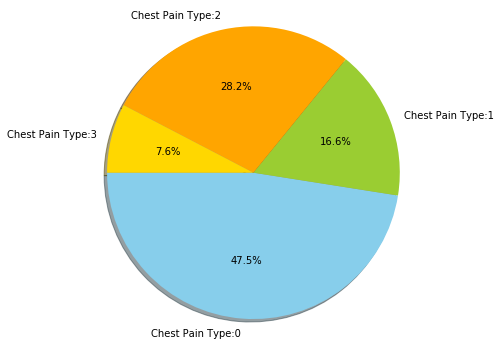

In [51]:
# Show the different chest pain types the patients in our dataset have
print('\nChest pain types distribution in our dataset\n')
plt.figure(figsize=(8,6))

# Data to plot
labels = 'Chest Pain Type:0','Chest Pain Type:1','Chest Pain Type:2','Chest Pain Type:3'
sizes = [len(data[data['cp'] == 0]),len(data[data['cp'] == 1]),
         len(data[data['cp'] == 2]),
         len(data[data['cp'] == 3])]
colors = ['skyblue', 'yellowgreen','orange','gold']
explode = (0, 0,0,0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
 
plt.axis('equal')
plt.show()

### Chol

In [52]:
# command for work offline
plotly.offline.init_notebook_mode(connected=True)

trace0 = go.Box(
    x=data[data['target'] == 0].target,
    y=data['chol'],
    marker=dict(
        color='#FF851B'
    ),
    name='no_heart_disease'
)

trace1 = go.Box(
    x=data[data['target'] == 1].target,
    y=data['chol'],
    marker=dict(
        color='#FF4136'
    ),
    name = 'heart_disease'
)


plotly.offline.iplot([trace0, trace1], filename='pie-chart')


# Step 4: Feature selection

In [53]:
# One hot encode non-numeric columns
a = pd.get_dummies(data['cp'], prefix = "cp", drop_first=True)
b = pd.get_dummies(data['thal'], prefix = "thal", drop_first=True)
c = pd.get_dummies(data['slope'], prefix = "slope", drop_first=True)


In [54]:
# Concatenate these one-hot-encoded columns with original data
frames = [data, a, b, c]
data = pd.concat(frames, axis = 1)
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,target,decade,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,1,4,0,0,1,1,0,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,1,1,0,1,0,0,1,0,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,2,1,0,0,0,1,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,3,1,0,0,0,1,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,1,3,0,0,0,0,1,0,0,1


In [55]:
# Drop original/not one-hot encoded columns
data = data.drop(columns = ['cp', 'thal', 'slope'])
data.head()


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,decade,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,1,4,0,0,1,1,0,0,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,1,0,1,0,0,1,0,0,0
2,41,0,130,204,0,0,172,0,1.4,0,1,2,1,0,0,0,1,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,1,3,1,0,0,0,1,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,1,3,0,0,0,0,1,0,0,1


# Step 5: Machine learning model training

In [56]:
# Naming our predictor variables
X= data.drop('target',axis=1)

# Naming our dependent variable
y=data['target']

In [57]:
# Train the model with the training sample data (80% of original data)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)


In [58]:
X_train.shape

(240, 19)

In [59]:
X_test.shape

(61, 19)

In [60]:
y_train.shape

(240,)

# Step 6: Model evaluation 

### Supervised Learning Algorithms:

### Creating Model for Logistic Regression

In [61]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
print("Test Accuracy {:.2f}%".format(lr.score(X_test,y_test)*100))


Test Accuracy 83.61%


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



### Creating Model for Elastic Net

In [62]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0)
regr.fit(X_train,y_train)
print("Test Accuracy {:.2f}%".format(regr.score(X_test,y_test)*100))


Test Accuracy 20.49%


### Creating Model for K-Nearest Neighbour (KNN) Classification


In [63]:
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

print("{} KNN Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))


2 KNN Score: 60.66%


### Creating Model for Support Vector Machine (SVM) Algorithm


In [64]:
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm.score(X_test,y_test)*100))


Test Accuracy of SVM Algorithm: 55.74%


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



### Creating Model for Naive Bayes Algorithm


In [65]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb.score(X_test,y_test)*100))


Accuracy of Naive Bayes: 80.33%


### Creating Model for Decision Tree Algorithm

In [66]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(X_test, y_test)*100))


Decision Tree Test Accuracy 68.85%


In [67]:
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
tree.export_graphviz(dtc, out_file='tree.dot')  

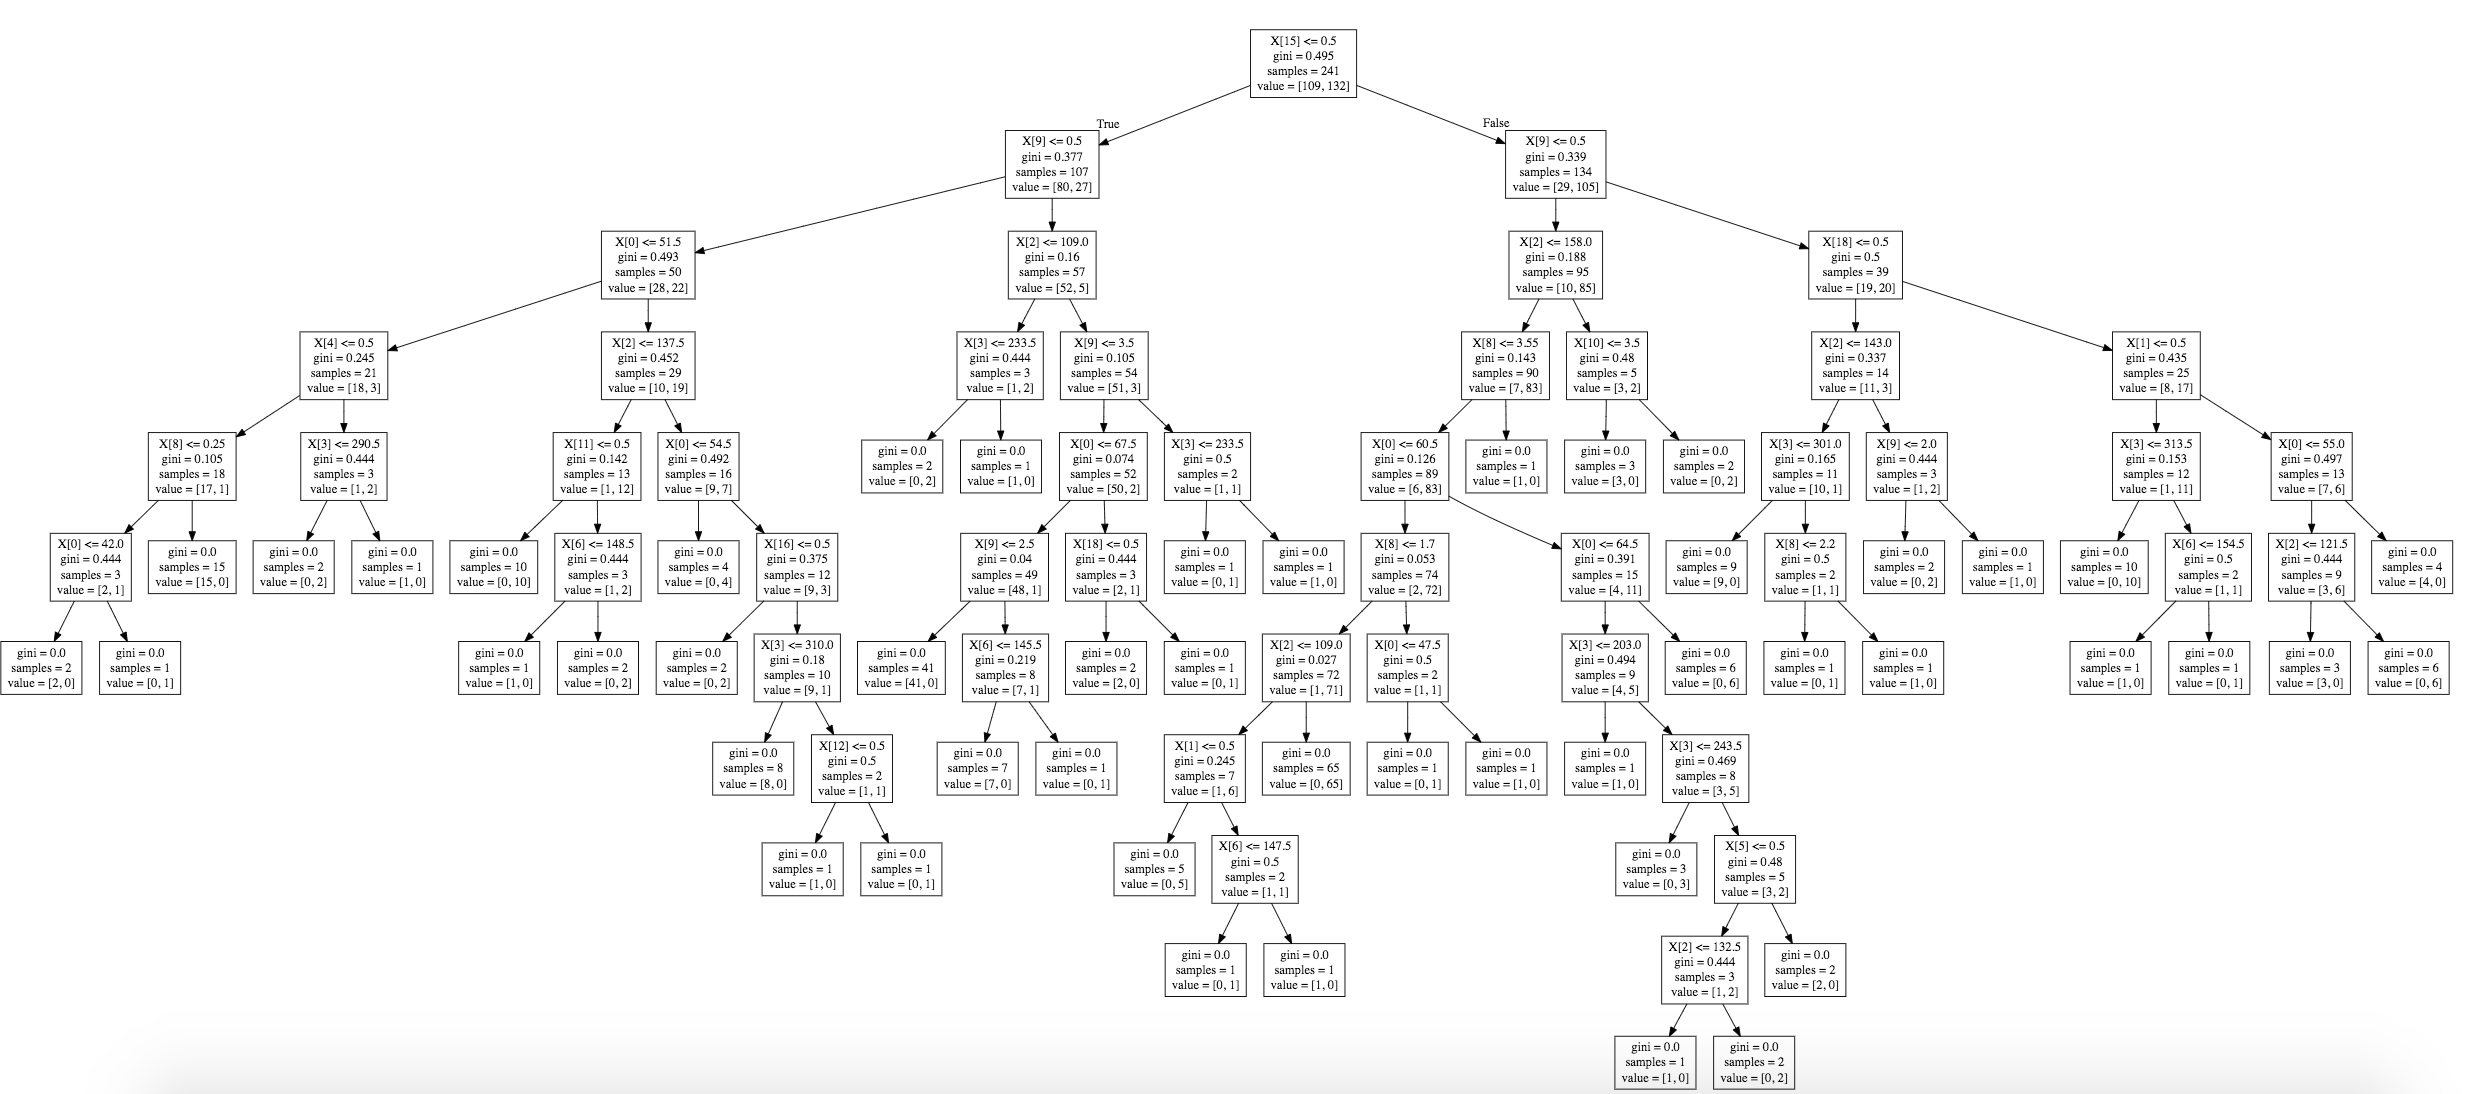

### Creating Model for Random Forest Classification


In [68]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 4)
rf.fit(X_train, y_train)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(X_test,y_test)*100))


Random Forest Algorithm Accuracy Score : 83.61%


### Improving Model for Random Forest Classification


In [69]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0

for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

90.16
1803


/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning:

The default value of n_estimators will chan

In [70]:
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)
score_rf

90.16

### Multilayer Perceptron (MLP) for binary classification

In [71]:
data.columns

Index(['age', 'sex', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'ca', 'target', 'decade', 'cp_1', 'cp_2', 'cp_3', 'thal_1',
       'thal_2', 'thal_3', 'slope_1', 'slope_2'],
      dtype='object')

**What is a perceptron?** a computer model or computerized machine devised to represent or simulate the ability of the brain to recognize and discriminate.


In [72]:
from keras.models import Sequential
from keras.layers import Dense, Dropout


**Why Sequential?** 
This is the simplest type of deep learning model, formed by a linear stack of layers since each output of one layer is the input of the layer below it as opposed to one layer having multiple input layers.


In [73]:
model = Sequential()

**Why add?** The add function adds a layer. 

**Why dense ?** Dense means it is a 2D layer. Dense(64) means it is a fully-connected layer with 64 hidden units.

**Why activation relu?** 
Firstly, we must understand why we activate the layers. We do so because that is the backbone of networks. If we do not apply a Activation function then the output signal would simply be a simple linear function.A linear function is just a polynomial of one degree. A Neural Network without Activation function would simply be a Linear regression Model, which has limited power and does not performs good most of the times. In A-NN we do the sum of products of inputs(X) and their corresponding Weights(W) and apply a Activation function f(x) to it to get the output of that layer and feed it as an input to the next layer.

The activation 'relu' is very good at what it does and can only be used in hidden layers. Activations can either be used through an Activation layer, or through the activation argument supported by all forward layers: model.add(Activation('tanh')) = model.add(Dense(64, activation='tanh'))

**Why input_dim?** The model needs to know what input shape it should expect. So the first layer needs to receive information about its input shape. Following layers can do automatic shape inference

In [74]:
data.shape


(301, 20)

In [75]:
model.add(Dense(64,activation='relu',input_dim=19))


Instructions for updating:
Colocations handled automatically by placer.


**Why dropout?** 
The gradients will only get propagated through 3 and 1. Therefore, while there are 3 neurons, they are only doing the work of a single neuron. This is clearly wasteful.
With dropout, you remove some neurons randomly. So there will be iterations in which neuron 1 is removed, and then neuron 3 will have to pass on the output of neuron 2 forward. This will generate non-zero gradients for neuron 2, and it will gradually start doing better than random guess. Then neuron 3 will also update its function to have a non-trivial linear combination of neurons 1 and 2, and the combined performance is likely to be higher than 80%.

In [76]:
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


**Why activation sigmoid?** 
Sigmoid functions and their combinations generally work better in the case of classifiers


In [77]:
model.add(Dense(1,activation='sigmoid'))


Before training a model,we need to configure the learning process through the compile method which always includes:
1. A loss function -> the objective that the model will try to minimize. Here our loss is 'binary_crossentropy' since we have a binary classification problem as opp. to (categorical classification)
2. An optimizer. This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the Optimizer class.
3. A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].It can be an existing metric or a custom metric function.



In [78]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [79]:
# To see the same examples more times (since we have very few data points)
model.fit(X_train,y_train,epochs=300)


Instructions for updating:
Use tf.cast instead.
Epoch 1/300
240/240 [==============================] - 0s 2ms/step - loss: 8.3021 - acc: 0.4500
Epoch 2/300
240/240 [==============================] - 0s 70us/step - loss: 7.1507 - acc: 0.5125
Epoch 3/300
240/240 [==============================] - 0s 68us/step - loss: 8.1890 - acc: 0.4542
Epoch 4/300
240/240 [==============================] - 0s 68us/step - loss: 7.6987 - acc: 0.4542
Epoch 5/300
240/240 [==============================] - 0s 63us/step - loss: 7.1918 - acc: 0.4875
Epoch 6/300
240/240 [==============================] - 0s 65us/step - loss: 6.5469 - acc: 0.5208
Epoch 7/300
240/240 [==============================] - 0s 71us/step - loss: 7.0260 - acc: 0.5042
Epoch 8/300
240/240 [==============================] - 0s 74us/step - loss: 6.1753 - acc: 0.5667
Epoch 9/300
240/240 [==============================] - 0s 73us/step - loss: 6.5525 - acc: 0.5333
Epoch 10/300
240/240 [==============================] - 0s 86us/step - loss: 6.1

240/240 [==============================] - 0s 66us/step - loss: 1.3151 - acc: 0.5958
Epoch 83/300
240/240 [==============================] - 0s 67us/step - loss: 1.4446 - acc: 0.5875
Epoch 84/300
240/240 [==============================] - 0s 62us/step - loss: 1.0729 - acc: 0.6000
Epoch 85/300
240/240 [==============================] - 0s 67us/step - loss: 1.1086 - acc: 0.5958
Epoch 86/300
240/240 [==============================] - 0s 73us/step - loss: 1.0588 - acc: 0.5625
Epoch 87/300
240/240 [==============================] - 0s 72us/step - loss: 1.1159 - acc: 0.5875
Epoch 88/300
240/240 [==============================] - 0s 65us/step - loss: 1.0248 - acc: 0.5500
Epoch 89/300
240/240 [==============================] - 0s 60us/step - loss: 0.8381 - acc: 0.6083
Epoch 90/300
240/240 [==============================] - 0s 61us/step - loss: 0.8206 - acc: 0.6208
Epoch 91/300
240/240 [==============================] - 0s 60us/step - loss: 0.8445 - acc: 0.6375
Epoch 92/300
240/240 [===========

240/240 [==============================] - 0s 60us/step - loss: 0.6394 - acc: 0.6375
Epoch 165/300
240/240 [==============================] - 0s 62us/step - loss: 0.6246 - acc: 0.6625
Epoch 166/300
240/240 [==============================] - 0s 59us/step - loss: 0.6642 - acc: 0.6750
Epoch 167/300
240/240 [==============================] - 0s 61us/step - loss: 0.6215 - acc: 0.6083
Epoch 168/300
240/240 [==============================] - 0s 61us/step - loss: 0.6607 - acc: 0.5917
Epoch 169/300
240/240 [==============================] - 0s 64us/step - loss: 0.6533 - acc: 0.6417
Epoch 170/300
240/240 [==============================] - 0s 63us/step - loss: 0.6166 - acc: 0.6792
Epoch 171/300
240/240 [==============================] - 0s 65us/step - loss: 0.6396 - acc: 0.6292
Epoch 172/300
240/240 [==============================] - 0s 62us/step - loss: 0.6535 - acc: 0.6000
Epoch 173/300
240/240 [==============================] - 0s 63us/step - loss: 0.6079 - acc: 0.6458
Epoch 174/300
240/240 [=

240/240 [==============================] - 0s 66us/step - loss: 0.5800 - acc: 0.6750
Epoch 247/300
240/240 [==============================] - 0s 64us/step - loss: 0.5740 - acc: 0.7000
Epoch 248/300
240/240 [==============================] - 0s 62us/step - loss: 0.6106 - acc: 0.6750
Epoch 249/300
240/240 [==============================] - 0s 63us/step - loss: 0.5753 - acc: 0.6917
Epoch 250/300
240/240 [==============================] - 0s 59us/step - loss: 0.6250 - acc: 0.6708
Epoch 251/300
240/240 [==============================] - 0s 61us/step - loss: 0.6224 - acc: 0.7083
Epoch 252/300
240/240 [==============================] - 0s 59us/step - loss: 0.5770 - acc: 0.7167
Epoch 253/300
240/240 [==============================] - 0s 61us/step - loss: 0.6132 - acc: 0.6375
Epoch 254/300
240/240 [==============================] - 0s 60us/step - loss: 0.6338 - acc: 0.6917
Epoch 255/300
240/240 [==============================] - 0s 61us/step - loss: 0.5791 - acc: 0.7000
Epoch 256/300
240/240 [=

In [80]:
score = model.evaluate(X_test, y_test, batch_size=300)
print("\n")
print("\nMulti-Layer Perceptron Loss Value, Accuracy Score:")
score

61/61 [==============================] - 0s 900us/step



Multi-Layer Perceptron Loss Value, Accuracy Score:


[0.551966667175293, 0.7213114500045776]

**Interpreting the score/ evaluate's return** The first element  is the loss value, and the second is the accuracy, so this model has 64.9% accuracy (to 1 decimal place) 

In [81]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1280      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________


**Interpreting model summary** 
The number of parameters of the layers depend on input, output, and each other: 
number_parameters = output_size * (input_size + 1) 
- 64 * 22 = 1408
- Dropout
- 64 * 65 = 4160
- Dropout
- 1 * 65 = 65

##### Deep learning hyperparameter optimisation

Talos radically changes the ordinary Keras workflow by fullyautomating hyperparameter tuning and model evaluation. Talos exposes Keras functionality entirely and there is no new syntax or templates to learn.

In [82]:
# Help

### Unsupervised Learning Algorithms:

### Creating Model for K-means Clustering


In [83]:
# We start by importing k-means from scikit-learn and then proceed to create 2 clusters.
#from sklearn.cluster import KMeans <- ya esta arriba
kmeans = KMeans(n_clusters=2)
kmeans.fit(data)

# Print the cluster labels.
kmeans.labels_


array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [84]:
# Compute the size of each cluster
np.bincount(kmeans.labels_)


array([183, 118])

In [85]:
data['labels'] = kmeans.labels_


In [86]:
data['target'].corr(data['labels'])


-0.1488697079796847

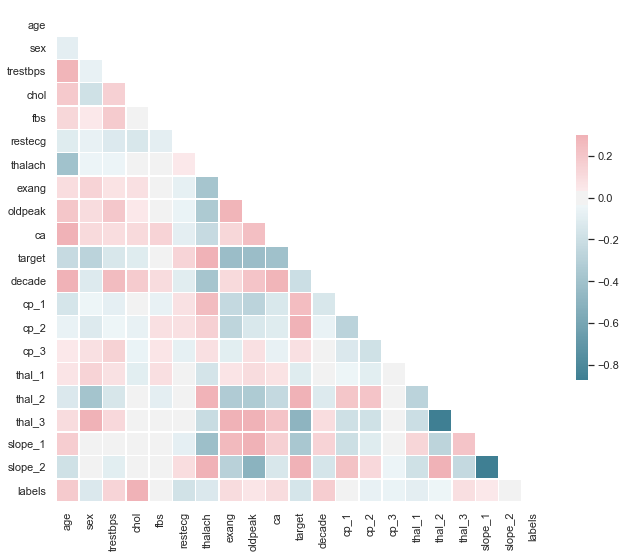

In [87]:
sns.set(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [88]:
data.groupby('labels').mean()


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,decade,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,slope_1,slope_2
labels,,,,,,,,,,,,,,,,,,,,
0,53.032787,0.732240,129.699454,214.524590,0.153005,0.601093,151.797814,0.289617,0.984699,0.639344,0.601093,2.863388,0.169399,0.306011,0.087432,0.076503,0.562842,0.349727,0.442623,0.480874
1,56.466102,0.610169,134.694915,293.398305,0.144068,0.415254,146.025424,0.389831,1.128814,0.847458,0.449153,3.186441,0.161017,0.245763,0.059322,0.033898,0.525424,0.440678,0.491525,0.449153


In [89]:
# chol and thalach have the largest difference between clusters.


Text(0, 0.5, 'Thalach')

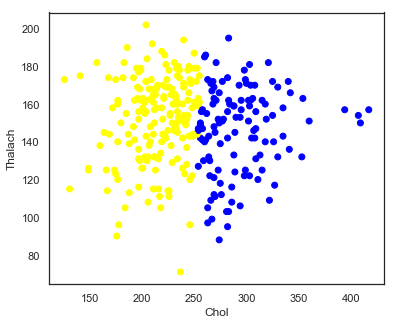

In [90]:
# Visualize K-Means Clusters

# 2D
colors = ['yellow','blue']
label = list(data.labels.values)
plt.subplots(figsize=(6,5))
plt.scatter(data.chol, data.thalach, c=label, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Chol')
plt.ylabel('Thalach')

Text(0.5, 0, 'Thalach')

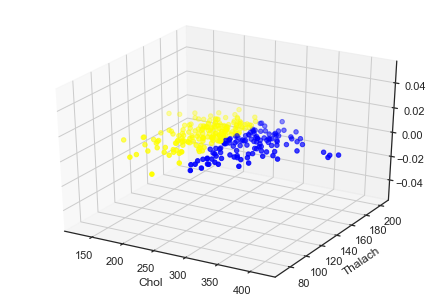

In [91]:
# 3D

fig = pyplot.figure()
ax = Axes3D(fig)
ax.scatter(data.chol, data.thalach, c=label, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('Chol')
plt.ylabel('Thalach')

### Using elbow curve visualizations to see if we can determine the best number of clusters to use.


The Yellowbrick library has 3 metrics that you can plot using the metric parameter:

- distortion: mean sum of squared distances to centers
- silhouette: mean ratio of intra-cluster and nearest-cluster distance
- calinski_harabaz: ratio of within to between cluster dispersion


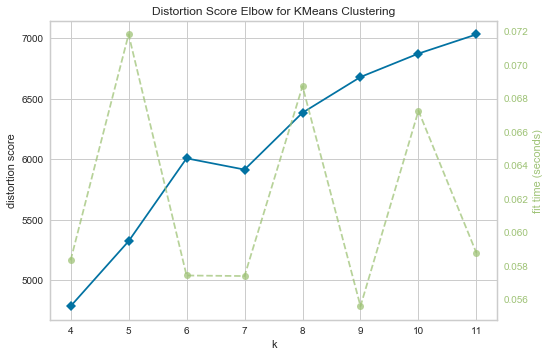

In [92]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric = 'distortion')
visualizer.fit(X)
visualizer.poof()


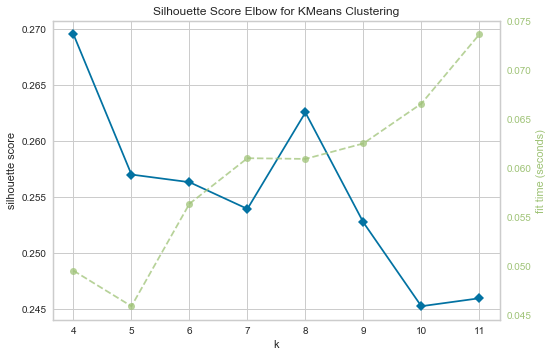

In [93]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric = 'silhouette')
visualizer.fit(X)
visualizer.poof()


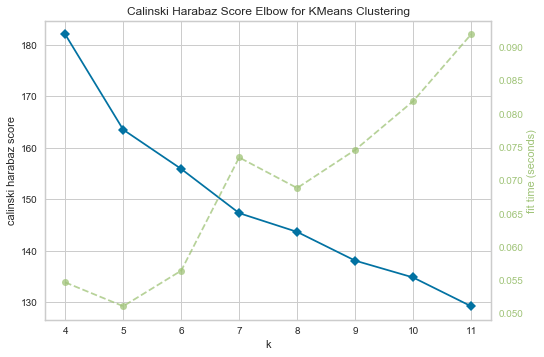

In [94]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric = 'calinski_harabaz')
visualizer.fit(X)
visualizer.poof()


In [95]:
# K-Means with 6,7,8 clusters

## t-SNE plots showing the clusters at a variety of perplexities.


**Why t-SNE plots?** Similar to the PCA, the t-Distributed Stochastic Neighbor Embedding (t-SNE) is a Dimensionality Reduction technique.


**Why different perplexities?** Perplexity is a number which represents roughly how many samples per cluster you expect to see. The technique is reasonably robust to the value you use here but altering it will have some effect. 

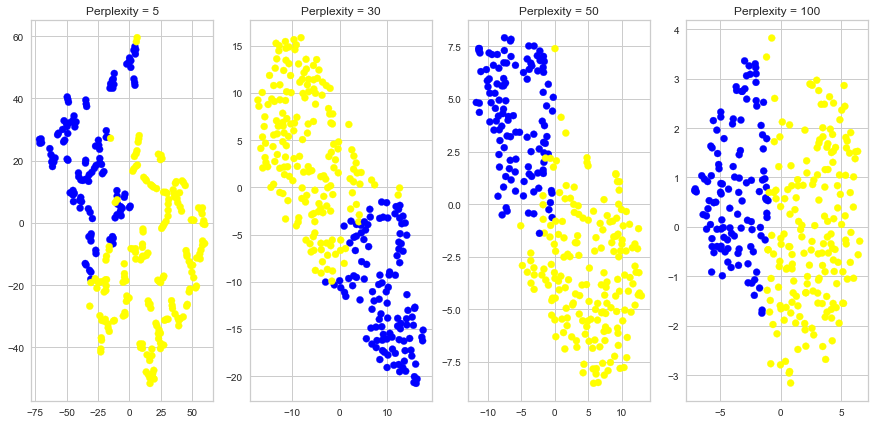

In [96]:
from sklearn.manifold import TSNE

fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c = data.labels, cmap=matplotlib.colors.ListedColormap(colors))
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()

### Creating Model for Agglomerative Hierarchical Clustering


In [97]:
from sklearn.metrics import silhouette_score

single = AgglomerativeClustering(n_clusters=2, linkage='single')
single.fit(X)
y1_pred = single.labels_.astype(np.int)

print("Model 1 Silhouette Score: {}".format(silhouette_score(X, y1_pred)))


Model 1 Silhouette Score: 0.2504720282499681


### Creating Model for Divisive Hierarchical Clustering


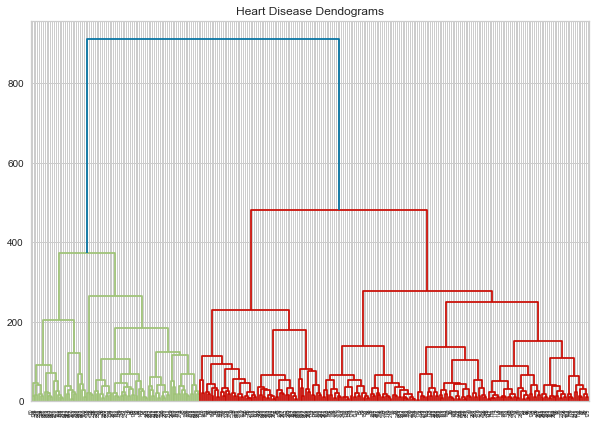

In [98]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Heart Disease Dendograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))  

# Step 7: Reporting and presentation of insights

In [99]:
# Creating Model for Logistic Regression
# Test Accuracy 83.61%

# Creating Model for K-Nearest Neighbour (KNN) Classification
# KNN Score: 20.49%

# Creating Model forSupport Vector Machine (SVM) Algorithm
# Test Accuracy of SVM Algorithm: 60.66%

# Creating Model for Naive Bayes Algorithm
# Accuracy of Naive Bayes: 80.33%

# Creating Model for Decision Tree Algorithm
# Decision Tree Test Accuracy 70.49%

# Creating Model for Random Forest Classification
# Random Forest Algorithm Accuracy Score : 90.16%

# Creating Neural Network
# Keras model Accuracy Score : 80.33%


In [100]:
# Comparing models on bar chart


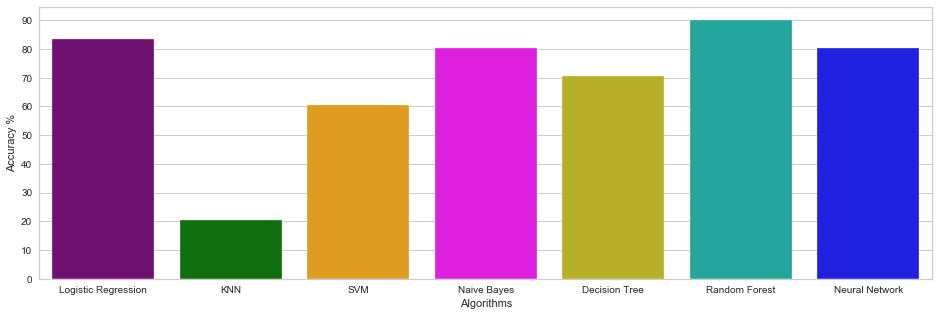

In [101]:
# Compare the methods based on r-score metric
methods = ["Logistic Regression", "KNN", "SVM", "Naive Bayes", "Decision Tree", "Random Forest","Neural Network"]
accuracy = [83.61, 20.49, 60.66, 80.33, 70.49, 90.16, 80.33]

colors = ["purple", "green", "orange", "magenta","#CFC60E","#0FBBAE", "blue"]

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=methods, y=accuracy, palette=colors)
plt.show()


# Step 8: Metrics 


## Logistic Regression Model

Permutation importance =  involves shuffling individual variables in the validation data (after a model has been fit), and seeing the effect on accuracy.

In [102]:
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())


Weight,Feature
0.0525 ± 0.0321,ca
0.0492 ± 0.0207,thalach
0.0459 ± 0.0245,cp_2
0.0197 ± 0.0525,oldpeak
0.0197 ± 0.0131,cp_3
0.0164 ± 0.0207,sex
0.0164 ± 0.0000,chol
0.0164 ± 0.0293,exang
0.0164 ± 0.0293,age
0.0131 ± 0.0131,thal_1


# Change
So, it looks like the most important factors in terms of permutation is a thalessemia result of 'reversable defect'. The high importance of 'max heart rate achieved' type makes sense, as this is the immediate, subjective state of the patient at the time of examination (as opposed to, say, age, which is a much more general factor).

Let's take a closer look at the number of major vessles using a Partial Dependence Plot (learn more here). These plots vary a single variable in a single row across a range of values and see what effect it has on the outcome. It does this for several rows and plots the average effect. Let's take a look at the 'num_major_vessels' variable, which was at the top of the permutation importance list,



In [103]:
actual_values = y_test
predictions = lr.predict(X_test)
    
accuracy_score = accuracy_score(actual_values, predictions)
balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
precision = precision_score(actual_values, predictions)
recall = recall_score(actual_values, predictions)
f1_score = f1_score(actual_values, predictions)
  
display("accuracy_score")
display(accuracy_score)
    
display("balanced_accuracy_score")
display(balanced_accuracy_score)
    
display("precision")
display(precision)
    
display("recall")
display(recall)
    
display("f1_score")
display(f1_score)
    

'accuracy_score'

0.8360655737704918

'balanced_accuracy_score'

0.8322510822510822

'precision'

0.8285714285714286

'recall'

0.8787878787878788

'f1_score'

0.8529411764705883

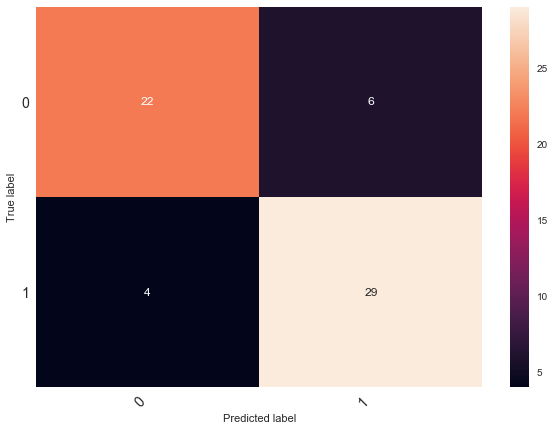

In [104]:
# not normalized
confusion_matrix(actual_values, predictions)
cm = confusion_matrix(actual_values, predictions)

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #return fig

print_confusion_matrix(cm, [0,1])


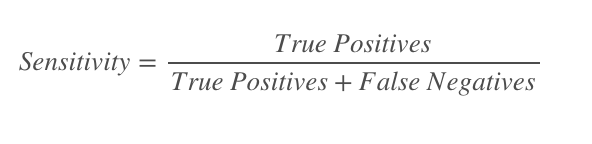

In [105]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )


Sensitivity :  0.8461538461538461


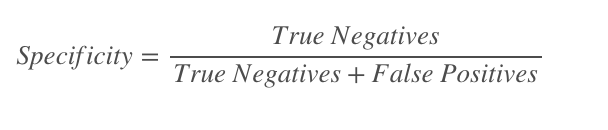

In [106]:
total=sum(sum(cm))

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)


Specificity :  0.8285714285714286


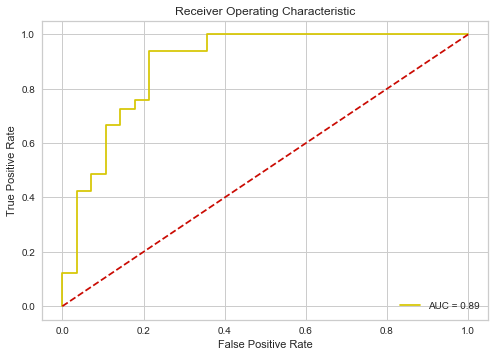

In [107]:
#Plot ROC Curve
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Area Under the Curve, or AUC is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. 
As a rule of thumb, an AUC can be classed as follows,
- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail


## Random Forest Model

In [108]:
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lr, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())


Weight,Feature
0.0525 ± 0.0321,ca
0.0492 ± 0.0207,thalach
0.0459 ± 0.0245,cp_2
0.0197 ± 0.0525,oldpeak
0.0197 ± 0.0131,cp_3
0.0164 ± 0.0207,sex
0.0164 ± 0.0000,chol
0.0164 ± 0.0293,exang
0.0164 ± 0.0293,age
0.0131 ± 0.0131,thal_1


In [109]:
# Metrics
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

## Models
# Supervised Learning/Non-deep Algorithms
from sklearn.ensemble import RandomForestClassifier

actual_values = y_test
predictions = rf.predict(X_test)

accuracy_score = accuracy_score(actual_values, predictions)
balanced_accuracy_score = balanced_accuracy_score(actual_values, predictions)
precision = precision_score(actual_values, predictions)
recall = recall_score(actual_values, predictions)
f1_score = f1_score(actual_values, predictions)
  
display("accuracy_score")
display(accuracy_score)
    
display("balanced_accuracy_score")
display(balanced_accuracy_score)
    
display("precision")
display(precision)
    
display("recall")
display(recall)
    
display("f1_score")
display(f1_score)
    
    


'accuracy_score'

0.9016393442622951

'balanced_accuracy_score'

0.900974025974026

'precision'

0.9090909090909091

'recall'

0.9090909090909091

'f1_score'

0.9090909090909091

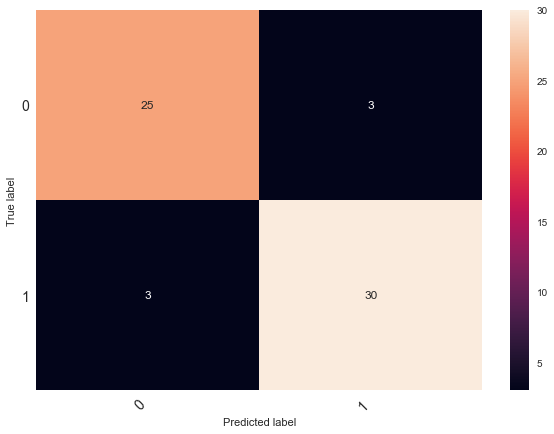

In [110]:
# not normalized
confusion_matrix(actual_values, predictions)
cm = confusion_matrix(actual_values, predictions)

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):

    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #return fig

print_confusion_matrix(cm, [0,1])


In [111]:
total=sum(sum(cm))
sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )


Sensitivity :  0.8928571428571429


In [112]:
specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)


Specificity :  0.9090909090909091


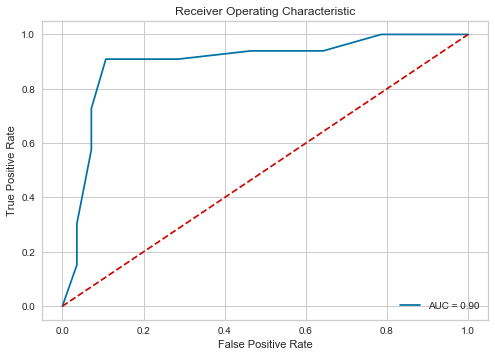

In [113]:
#Plot ROC Curve
probs = rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



## ROC Curve Comparing Random Forest & Logistic Regression

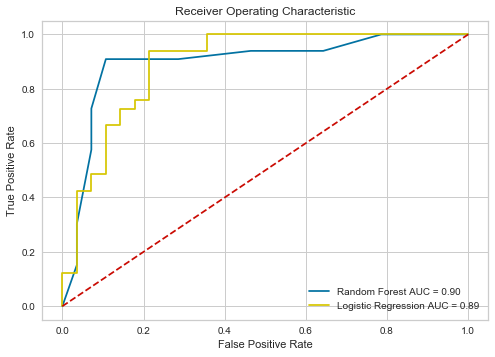

In [114]:
# Comparing models on ROC Curve
probs = rf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


probs2 = lr.predict_proba(X_test)
preds2 = probs2[:,1]
fpr2, tpr2, threshold2 = metrics.roc_curve(y_test, preds2)
roc_auc2 = metrics.auc(fpr2, tpr2)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Random Forest AUC = %0.2f' % roc_auc)
plt.plot(fpr2, tpr2, 'y', label = 'Logistic Regression AUC = %0.2f' % roc_auc2)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



## Conclusions


- Logistic regression showed a high accuracy. Moreover, it has a high interpretability power since ORs are very easily understandable by doctors that can use these models. In this sense,  for example, an OR of 5 in smoking can indicate that you multiply 5 times the risk of contracting heart disease.


- Random Forest showed the greatest accuracy potential (90%). Even though we can see the relative weight of each variable, we cannot see whether that variable is detrimental or beneficial (the direction of the effect), which makes it less useful and interpretable to doctors. gística. 


# Step 9: Real-World Application

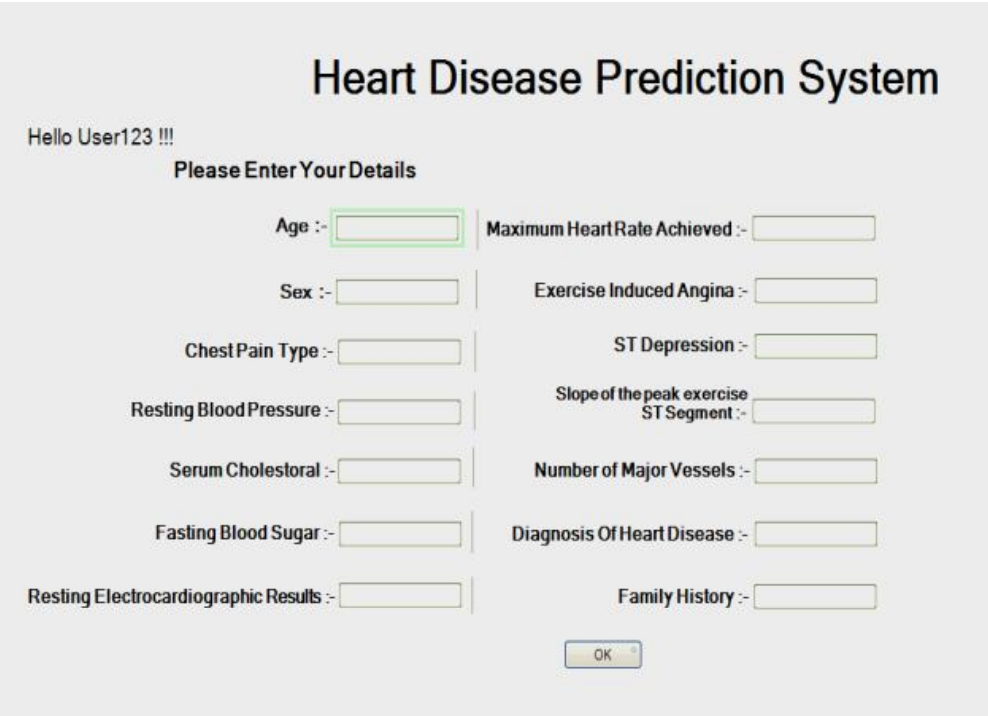

Cardiologist/ Nurse input details:

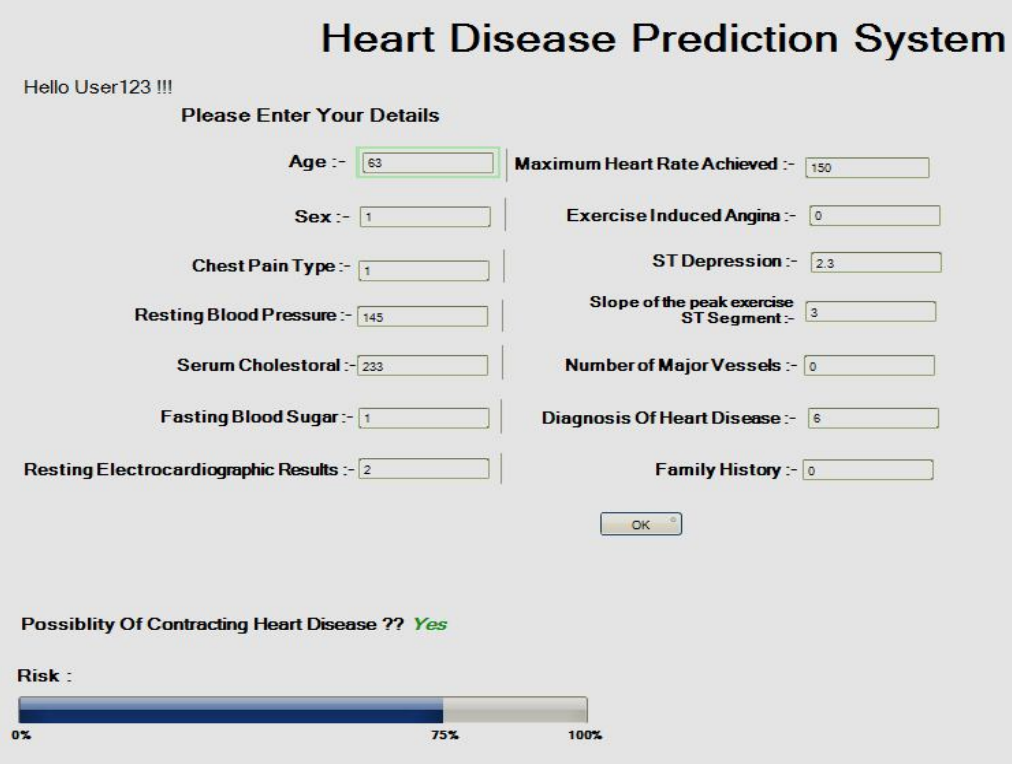

# ====================

# Next Steps

1. Measure with a dataset of +50,000 patients to fine-tune models
2. Implement in hospitals to engage in pre-emptive measures
